In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'data/oecd/Flunet_1995_2014_for_Epipoi_AllB.csv'
df_allb = pd.read_csv(filename)

filename = 'data/oecd/Flunet_countries_Lat_Long.csv'
df_latlong = pd.read_csv(filename)

In [3]:
print(df_allb.shape)


(240, 146)


In [4]:
print(df_allb.dtypes)

Year                                    int64
Month                                   int64
Afghanistan                           float64
Albania                               float64
Algeria                               float64
                                       ...   
Uruguay                               float64
Uzbekistan                            float64
Venezuela (Bolivarian Republic of)    float64
Viet Nam                              float64
Zambia                                float64
Length: 146, dtype: object


In [11]:
#convert year month to datetime
df = df_allb
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]

# Keep individual for grouping
df = df.drop(columns=['Year','Month'])
df = df.set_index('Date')


In [12]:
# df = df.fillna(0)
print('Flu Data Empty Cells (not zero): ', df.isnull().sum().sum())
print('Flu Data Full  Cells (not zero): ', df.notnull().sum().sum())


Flu Data Empty Cells (not zero):  23800
Flu Data Full  Cells (not zero):  10760


In [13]:
print(df.sum().describe())

count       144.000000
mean       2748.847222
std       10875.543889
min           0.000000
25%          93.750000
50%         430.500000
75%        1390.750000
max      106841.000000
dtype: float64


In [10]:
df.columns

Index(['Year', 'Month', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uganda', 'Ukraine',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Venezuela (Bolivarian Republic of)', 'Viet Nam',
       'Zambia'],
      dtype='object', length=146)

In [14]:
df_fluPerCountries = df.sum()
df_fluPerCountries.describe()

count       144.000000
mean       2748.847222
std       10875.543889
min           0.000000
25%          93.750000
50%         430.500000
75%        1390.750000
max      106841.000000
dtype: float64

In [25]:
df_transpose = df.transpose()

In [35]:
df_description = df.describe()


In [27]:
df_description.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Columns: 240 entries, 1995-01-01 to 2014-12-01
dtypes: float64(240)
memory usage: 15.1+ KB


In [36]:
df_description.index.name = 'date'

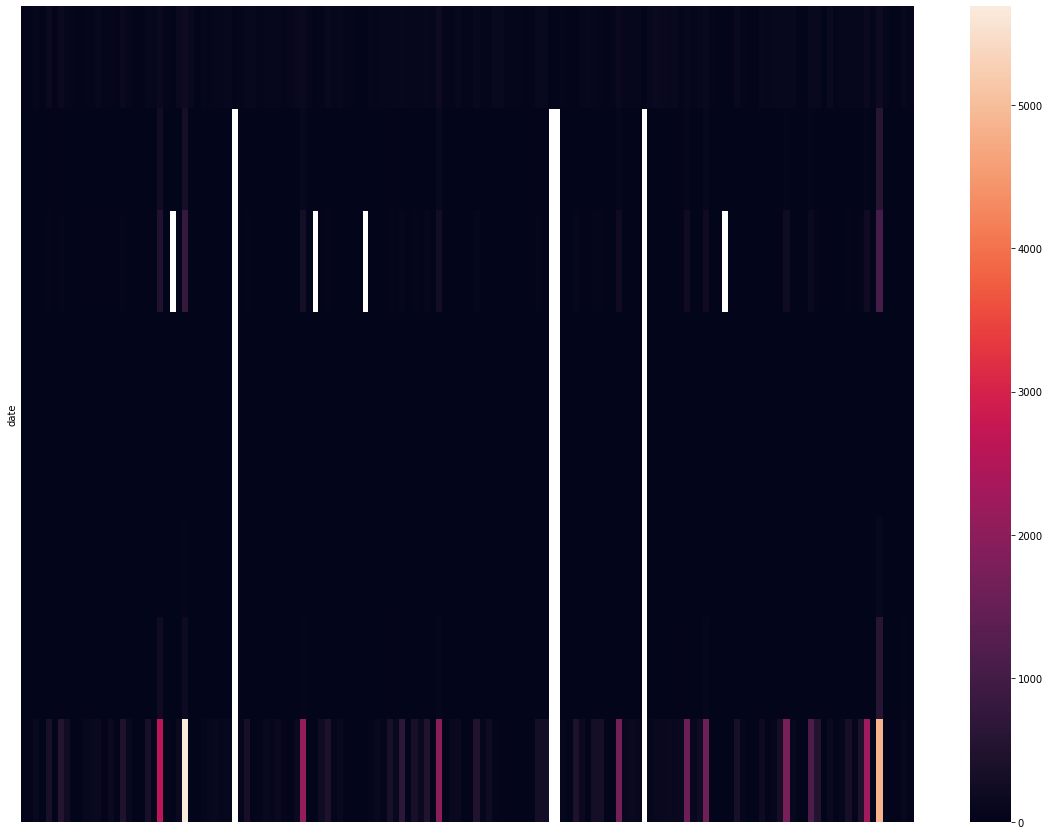

In [37]:
plt.subplots(figsize=(20,15))
heat_map = sns.heatmap(df_description,xticklabels=False, yticklabels=False)

In [15]:
#we need to find the population of the dataset to get the infection per population

pop_url = 'data/worldbank/worldbank_population.csv'
# to load only tabular data
pop_data = pd.read_csv(pop_url, index_col=0,skiprows=4)


In [16]:
pop_data.drop(pop_data.columns[0:3],axis=1, inplace=True)
pop_data.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN


In [17]:
#set_option('display_width', 100)
#set_option('precision', 3)
correlations = pop_data.corr(method='pearson')
skew = pop_data.skew()
print(skew.min())

4.87825121364672


In [18]:
pop_data.melt()

,variable,value
0,1960,54211.0
1,1960,8996973.0
2,1960,5454933.0
3,1960,1608800.0
4,1960,13411.0
...,...,...
16099,Unnamed: 64,NaN
16100,Unnamed: 64,NaN
16101,Unnamed: 64,NaN
16102,Unnamed: 64,NaN
